In [1]:
import pandas as pd
dataset = pd.read_excel(r"C:\Users\mxc00320\Desktop\data.xlsx", engine='openpyxl')
print(dataset.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [2]:
import pandas as pd
import numpy as np
data = pd.read_excel(r"C:\Users\mxc00320\Desktop\data.xlsx", engine='openpyxl')
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.dropna(subset=['CustomerID', 'Quantity'], inplace=True)
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek


 Exploratory Data Analysis (EDA)
 Explore the data by creating some basic visualizations. 
 This will help us understand trends in sales, and customer behavior.

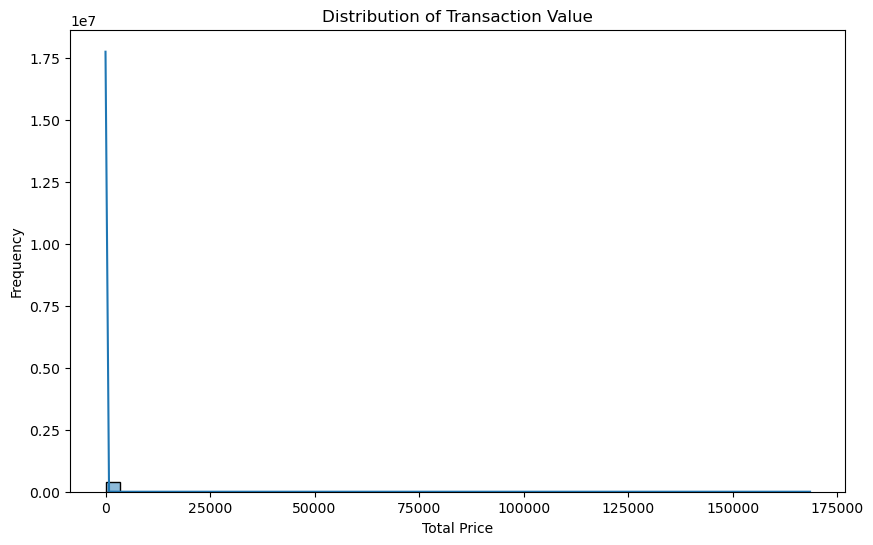

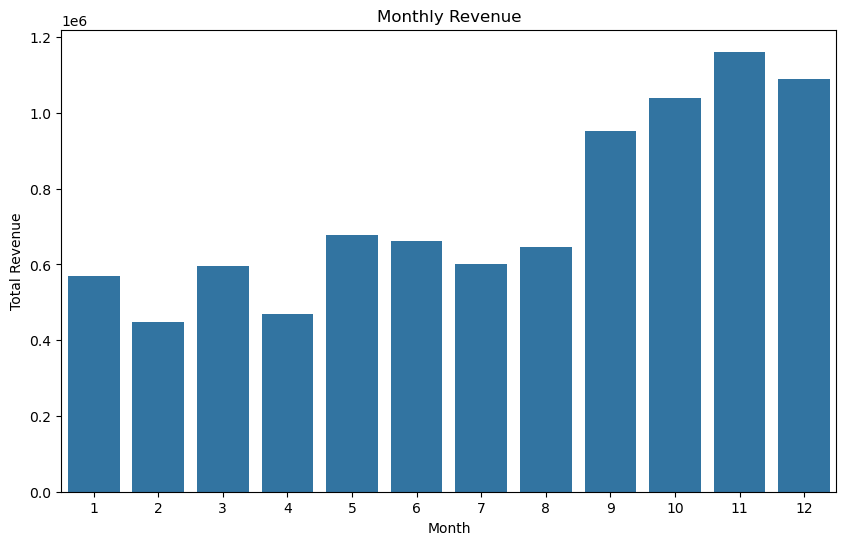

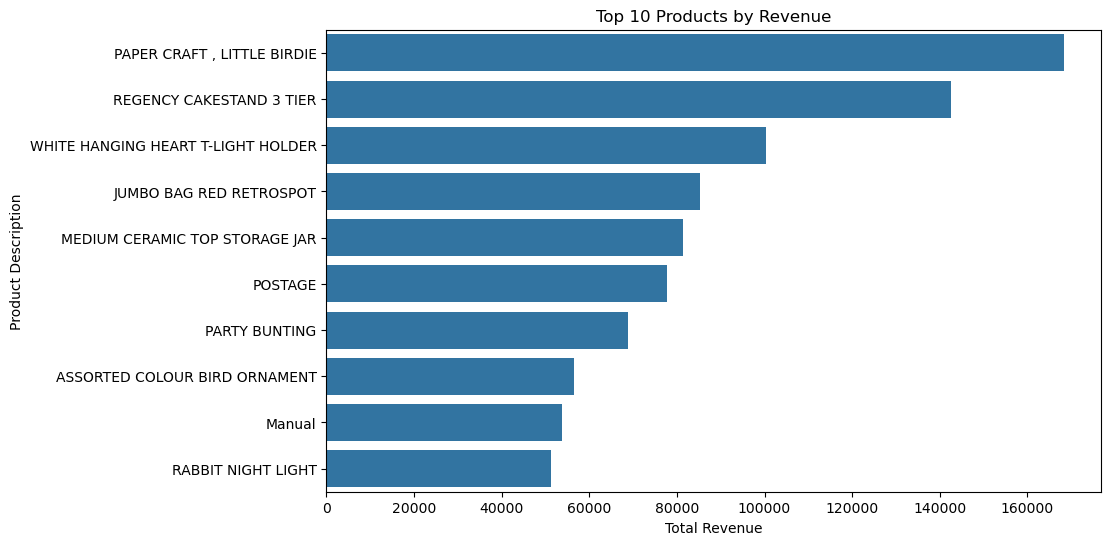

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of Transaction Value')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()
monthly_revenue = data.groupby('Month')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='TotalPrice', data=monthly_revenue)
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()
top_products = data.groupby('Description')['TotalPrice'].sum().reset_index()
top_products = top_products.sort_values('TotalPrice', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPrice', y='Description', data=top_products)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.show()


Customer Segmentation
Creating a feature for customer segmentation. We can calculate the Recency, Frequency, and Monetary (RFM) metrics to group customers based on their purchasing behavior

In [4]:
last_purchase = data.groupby('CustomerID')['InvoiceDate'].max()
last_purchase = pd.DataFrame(last_purchase).reset_index()
last_purchase['Recency'] = (data['InvoiceDate'].max() - last_purchase['InvoiceDate']).dt.days

frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

monetary = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)

rfm = pd.merge(last_purchase, frequency, on='CustomerID')
rfm = pd.merge(rfm, monetary, on='CustomerID')
print(rfm.head())


   CustomerID         InvoiceDate  Recency  Frequency  Monetary
0     12346.0 2011-01-18 10:01:00      325          1  77183.60
1     12347.0 2011-12-07 15:52:00        1          7   4310.00
2     12348.0 2011-09-25 13:13:00       74          4   1797.24
3     12349.0 2011-11-21 09:51:00       18          1   1757.55
4     12350.0 2011-02-02 16:01:00      309          1    334.40


Predictive Modeling, for future purchases: K-Means clustering for customer segmentation and for predicting customer spending

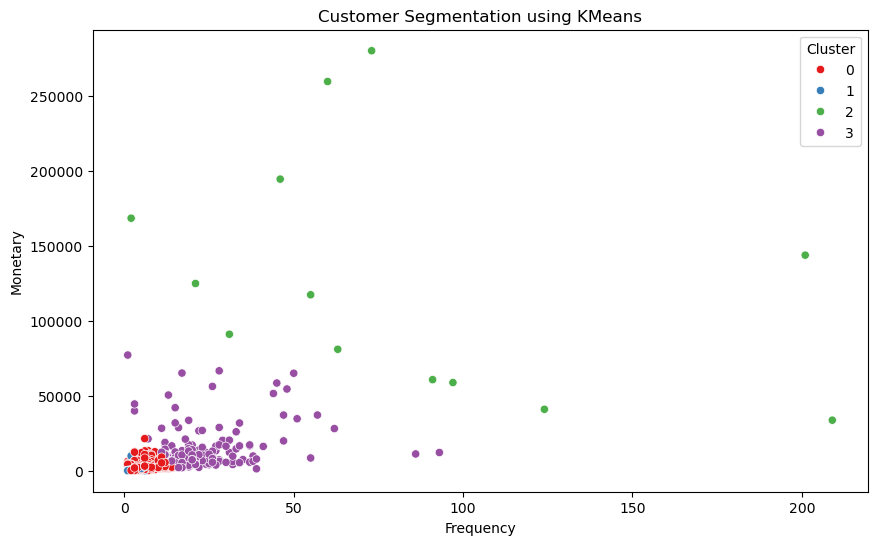

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='Set1')
plt.title('Customer Segmentation using KMeans')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

In [6]:
rfm.to_csv('processed_customer_data.csv', index=False)

In [7]:
import os
os.listdir()

['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.ms-ad',
 '.vscode',
 'AI and Machine Learning for Climate Change Prediction.ipynb',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Desktop',
 'desktop.ini',
 'Documents',
 'Downloads',
 'E-Commerce Analysis.ipynb',
 'Favorites',
 'Links',
 'Local Settings',
 'Microsoft',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{5c818850-7128-11ef-b80b-bc2411537e3d}.TxR.0.regtrans-ms',
 'NTUSER.DAT{5c818850-7128-11ef-b80b-bc2411537e3d}.TxR.1.regtrans-ms',
 'NTUSER.DAT{5c818850-7128-11ef-b80b-bc2411537e3d}.TxR.2.regtrans-ms',
 'NTUSER.DAT{5c818850-7128-11ef-b80b-bc2411537e3d}.TxR.blf',
 'NTUSER.DAT{5c818851-7128-11ef-b80b-bc2411537e3d}.TM.blf',
 'NTUSER.DAT{5c818851-7128-11ef-b80b-bc2411537e3d}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{5c818851-7128-11ef-b80b-bc2411537e3d}.TMContainer0000000

In [8]:
rfm.to_csv('processed_customer_data.csv', index=False, sep=',', encoding='utf-8')

In [9]:
from IPython.display import FileLink
FileLink('processed_customer_data.csv')

C:\Users\mxc00320\processed_customer_data.csv

Recency vs Frequency (Scatter Plot)

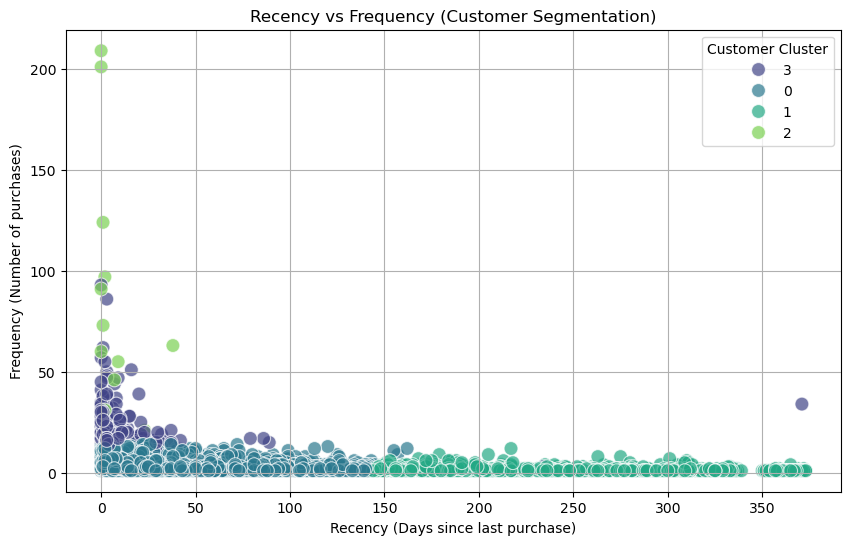

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r"C:\Users\mxc00320\Desktop\processed_customer_data .csv"


df = pd.read_csv(file_path)

df['Cluster'] = df['Cluster'].astype(str)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Recency', y='Frequency', hue='Cluster', palette='viridis', s=100, alpha=0.7)

plt.title("Recency vs Frequency (Customer Segmentation)")
plt.xlabel("Recency (Days since last purchase)")
plt.ylabel("Frequency (Number of purchases)")
plt.legend(title="Customer Cluster")
plt.grid(True)
plt.show()


RFM Segmentation (Cluster Plot - Pairplot)

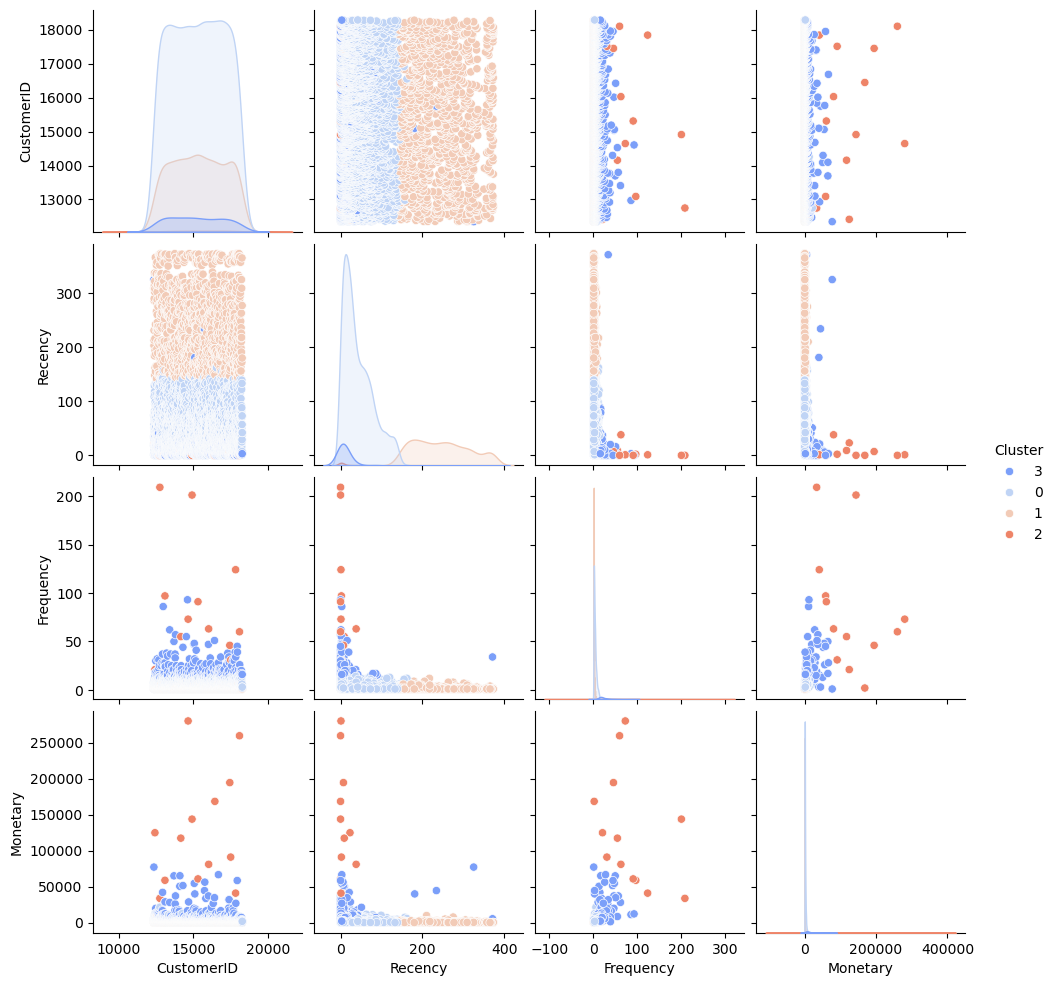

In [19]:
sns.pairplot(df, hue="Cluster", diag_kind="kde", palette="coolwarm")
plt.show()

Monetary Distribution (Histogram)

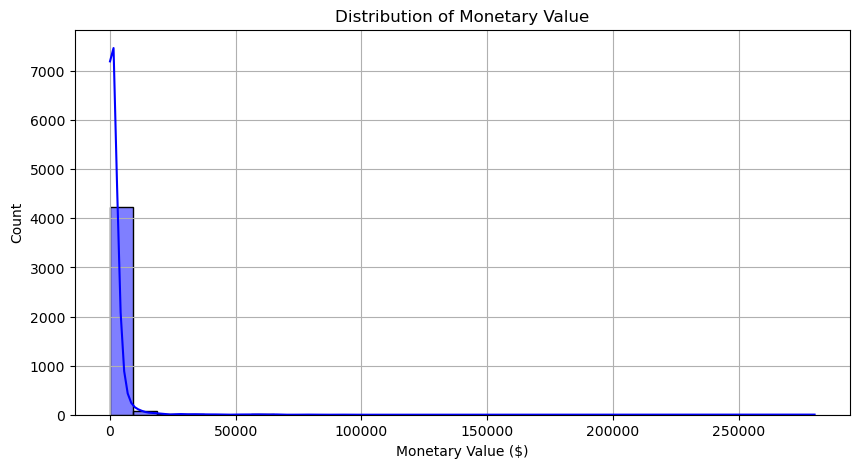

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Monetary'], bins=30, kde=True, color='blue')

plt.title("Distribution of Monetary Value")
plt.xlabel("Monetary Value ($)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

Recency, Frequency, Monetary (Pair Plot)

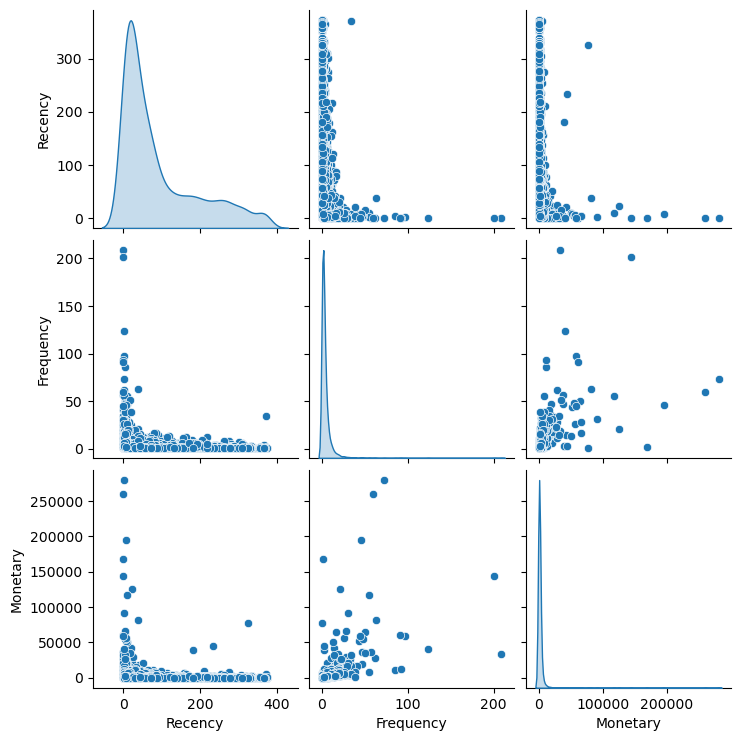

In [13]:
sns.pairplot(df[['Recency', 'Frequency', 'Monetary']], diag_kind='kde')
plt.show()

 Monetary vs Frequency (Bubble Chart)

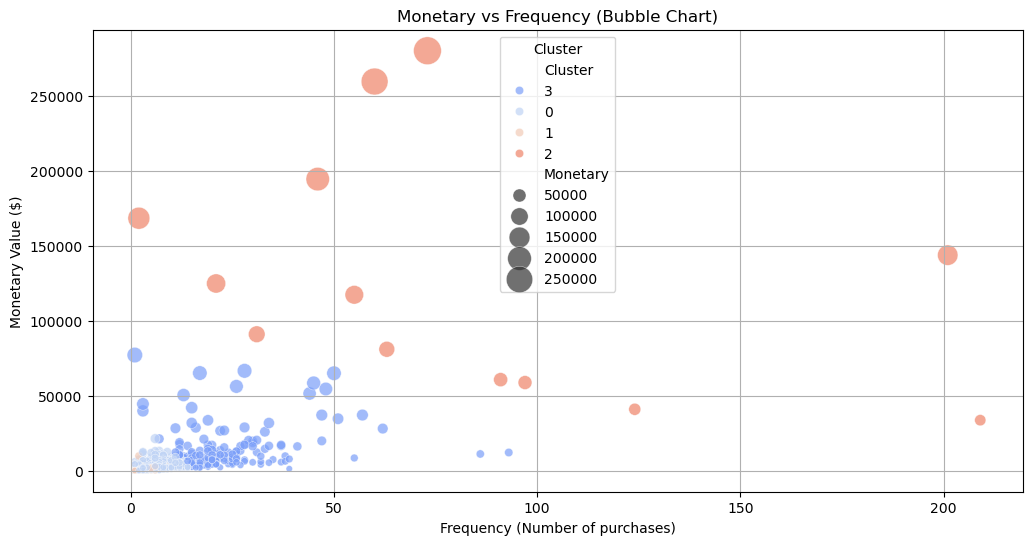

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='Cluster', size='Monetary', sizes=(20, 400), palette='coolwarm', alpha=0.7)

plt.title("Monetary vs Frequency (Bubble Chart)")
plt.xlabel("Frequency (Number of purchases)")
plt.ylabel("Monetary Value ($)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

RFM Heatmap

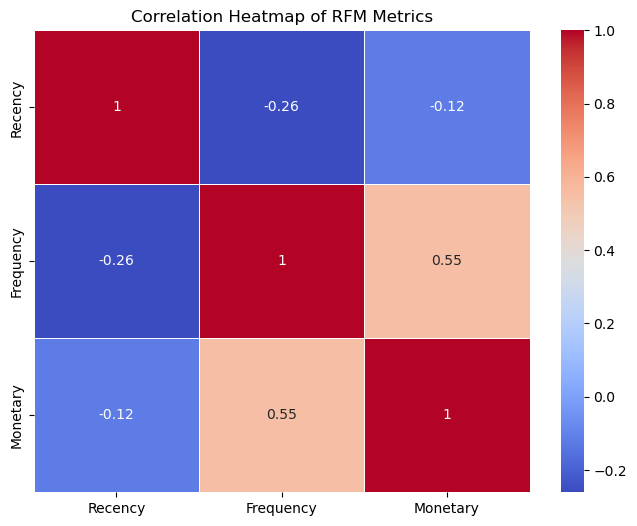

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of RFM Metrics")
plt.show()

Gaussian Mixture Model (GMM) for Soft Clustering

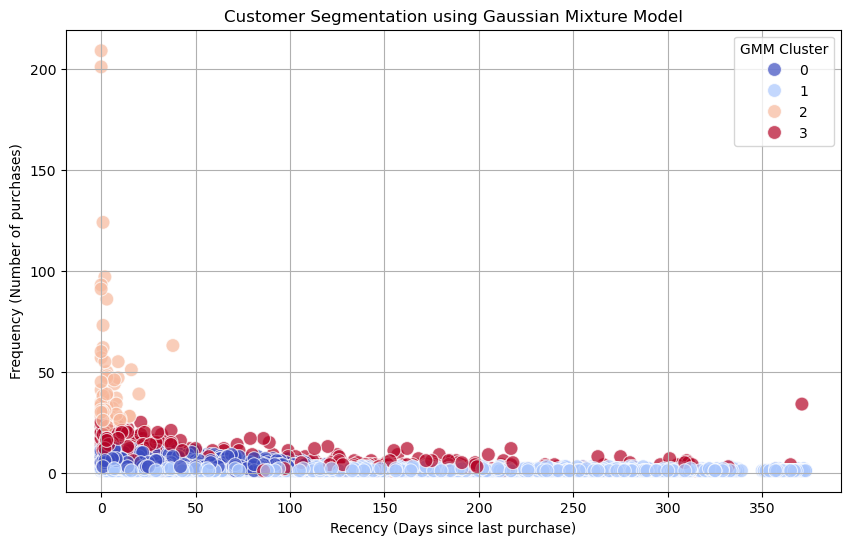

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
X = df[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
gmm = GaussianMixture(n_components=4, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Recency'], y=df['Frequency'], hue=df['GMM_Cluster'], palette='coolwarm', s=100, alpha=0.7)
plt.title("Customer Segmentation using Gaussian Mixture Model")
plt.xlabel("Recency (Days since last purchase)")
plt.ylabel("Frequency (Number of purchases)")
plt.legend(title="GMM Cluster")
plt.grid(True)
plt.show()

C:\Users\mxc00320\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


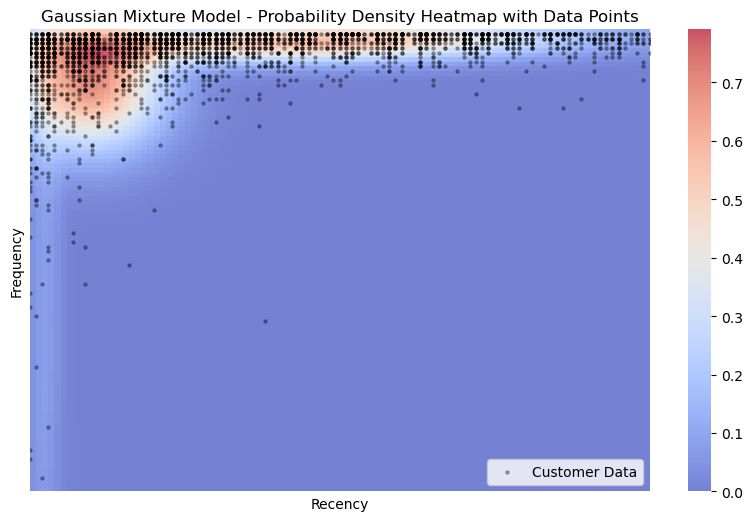

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
X = df[['Recency', 'Frequency']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

x_range = np.linspace(X['Recency'].quantile(0.01), X['Recency'].quantile(0.99), 100)
y_range = np.linspace(X['Frequency'].quantile(0.01), X['Frequency'].quantile(0.99), 100)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
grid_points = np.column_stack([X_grid.ravel(), Y_grid.ravel()])
grid_scaled = scaler.transform(grid_points)  
probs = np.exp(gmm.score_samples(grid_scaled)) 
probs = probs.reshape(X_grid.shape)

plt.figure(figsize=(10, 6))
sns.heatmap(probs, cmap="coolwarm", xticklabels=False, yticklabels=False, alpha=0.7)

plt.scatter(X['Recency'], X['Frequency'], color='black', alpha=0.3, s=5, label='Customer Data')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Gaussian Mixture Model - Probability Density Heatmap with Data Points')
plt.legend()
plt.show()


Supervised Learning (Random Forest) for Customer Segmentation Prediction

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df['Cluster'] = df['Cluster'].astype(int)

X = df[['Recency', 'Frequency', 'Monetary']]
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       596
           1       1.00      1.00      1.00       226
           2       1.00      0.50      0.67         4
           3       0.95      1.00      0.98        42

    accuracy                           1.00       868
   macro avg       0.99      0.87      0.91       868
weighted avg       1.00      1.00      1.00       868



In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       580
           1       1.00      1.00      1.00       288

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



C:\Users\mxc00320\AppData\Local\Temp\ipykernel_7224\1676491089.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X.columns, palette="viridis")


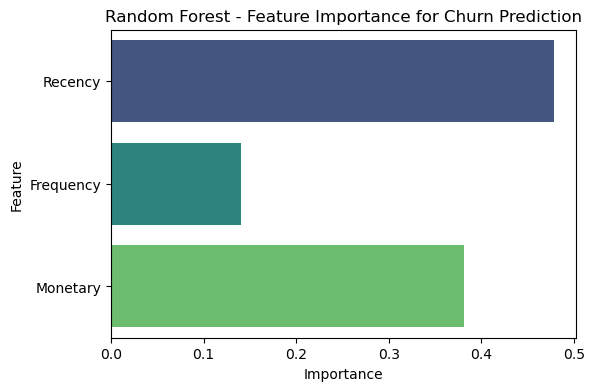

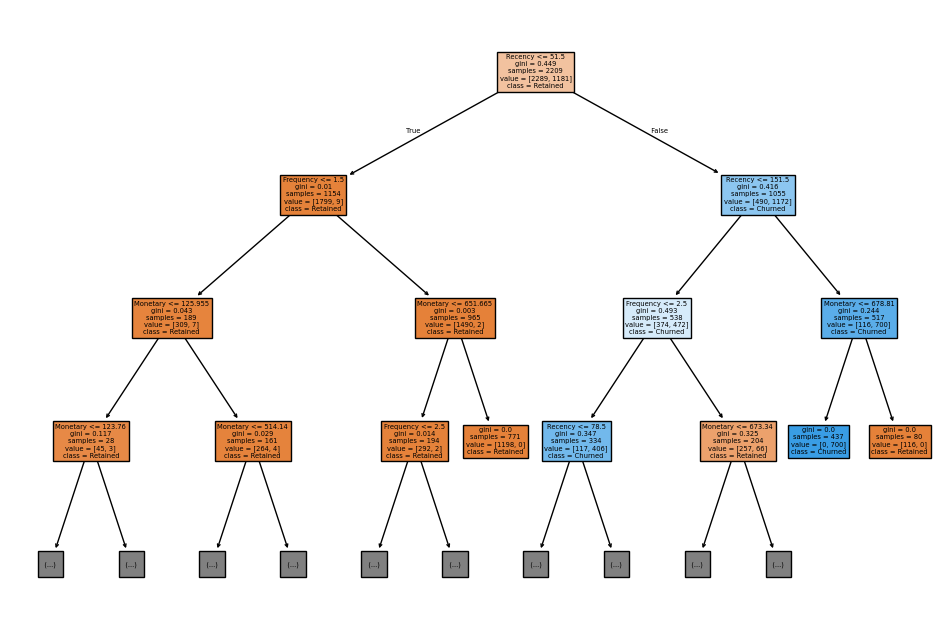

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree  
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
importances = rf_model.feature_importances_
sns.barplot(x=importances, y=X.columns, palette="viridis")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest - Feature Importance for Churn Prediction')
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=["Retained", "Churned"], filled=True, max_depth=3)
plt.show()



In [24]:
!pip install hmmlearn

Hidden Markov Model (HMM) for Customer Behavior Analysis

In [26]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['DaysSinceLastPurchase'] = (df['InvoiceDate'].max() - df['InvoiceDate']).dt.days

X = df[['DaysSinceLastPurchase', 'Frequency', 'Monetary']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_hmm = X_scaled.reshape(-1, 1, 3)


In [29]:
model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000, random_state=42)
model.fit(X_scaled)
df['HMM_Cluster'] = model.predict(X_scaled)
print(df[['CustomerID', 'DaysSinceLastPurchase', 'Frequency', 'Monetary', 'HMM_Cluster']].head())

   CustomerID  DaysSinceLastPurchase  Frequency  Monetary  HMM_Cluster
0       12346                    325          1  77183.60            1
1       12347                      1          7   4310.00            1
2       12348                     74          4   1797.24            1
3       12349                     18          1   1757.55            1
4       12350                    309          1    334.40            0


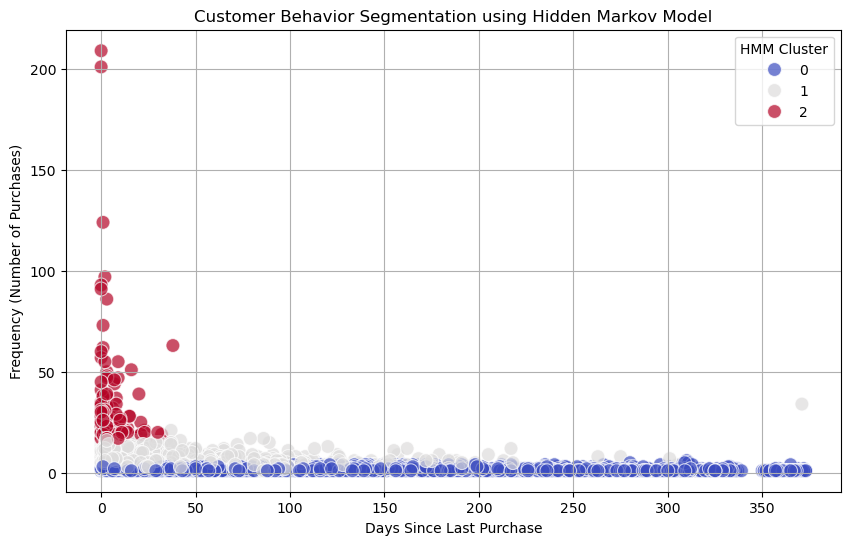

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['DaysSinceLastPurchase'], y=df['Frequency'], hue=df['HMM_Cluster'], palette='coolwarm', s=100, alpha=0.7)
plt.title("Customer Behavior Segmentation using Hidden Markov Model")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Frequency (Number of Purchases)")
plt.legend(title="HMM Cluster")
plt.grid(True)
plt.show()


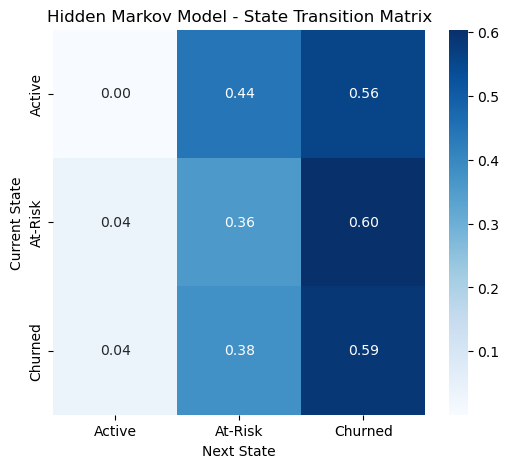

In [37]:
import seaborn as sns
import numpy as np
from hmmlearn import hmm

X = df[['Recency', 'Frequency']].values

hmm_model = hmm.GaussianHMM(n_components=3, covariance_type="full", random_state=42)
hmm_model.fit(X)

transition_matrix = hmm_model.transmat_

plt.figure(figsize=(6, 5))
sns.heatmap(transition_matrix, annot=True, cmap="Blues", fmt=".2f",
            xticklabels=['Active', 'At-Risk', 'Churned'],
            yticklabels=['Active', 'At-Risk', 'Churned'])
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.title("Hidden Markov Model - State Transition Matrix")
plt.show()


In [39]:
def classify_customer(row):
    if row['Recency'] < 30 and row['Frequency'] > 5:
        return 'Highly Engaged'
    elif row['Recency'] >= 30 and row['Recency'] < 90:
        return 'At-Risk'
    else:
        return 'Churned'

df['State'] = df.apply(classify_customer, axis=1)


In [40]:
state_mapping = {'Highly Engaged': 0, 'At-Risk': 1, 'Churned': 2}
df['State_Code'] = df['State'].map(state_mapping)


In [42]:
print(df.columns)  


Index(['CustomerID', 'InvoiceDate', 'Recency', 'Frequency', 'Monetary',
       'Cluster', 'GMM_Cluster', 'DaysSinceLastPurchase', 'HMM_Cluster',
       'Churned', 'State', 'State_Code'],
      dtype='object')


In [43]:
df['State_Code'] = df['State'].map({'Highly Engaged': 0, 'At-Risk': 1, 'Churned': 2})

sequences = df.groupby('CustomerID')['State_Code'].apply(list)

print(sequences.head())

lengths = [len(seq) for seq in sequences]
X = np.concatenate(sequences.to_numpy()).reshape(-1, 1)


CustomerID
12346    [2]
12347    [0]
12348    [1]
12349    [2]
12350    [2]
Name: State_Code, dtype: object
